# RL training comparison

## CartPole-v1
with state normalization

../data/mlp/log/cartpole/reward1.npy
../data/mlp/log/cartpole/reward2.npy
../data/mlp/log/cartpole/reward3.npy
../data/mlp/log/cartpole/reward4.npy
../data/mlp/log/cartpole/reward5.npy
../data/cdt/log/cartpole/rl_reward1.npy
../data/cdt/log/cartpole/rl_reward2.npy
../data/cdt/log/cartpole/rl_reward3.npy
../data/cdt/log/cartpole/rl_reward4.npy
../data/cdt/log/cartpole/rl_reward5.npy
../data/sdt/log/cartpole/rl_reward1.npy
../data/sdt/log/cartpole/rl_reward2.npy
../data/sdt/log/cartpole/rl_reward3.npy
../data/sdt/log/cartpole/rl_reward4.npy
../data/sdt/log/cartpole/rl_reward5.npy


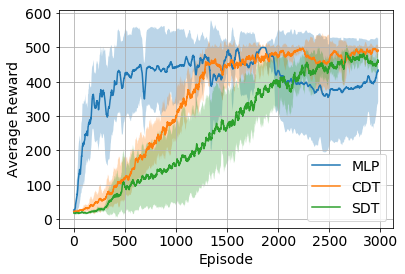

In [8]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

EnvName = 'CartPole-v1'
model=['mlp', 'cdt', 'sdt']  # 'rl' i.e. 'mlp'
id_list=np.arange(1,6)

def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)

    
plt.figure(figsize=(6,4))

for m in model:
    data=[]
    conf_path = '../src/'+m
    json_fname = [filename for filename in os.listdir(conf_path) if filename.endswith("rl_train.json")]
    conf_path = conf_path+'/'+json_fname[0]
    with open(conf_path, "r") as read_file:
        rl_confs = json.load(read_file)  # hyperparameters for rl training
    for i in id_list:
        log_path = rl_confs[EnvName]["train_confs"]["log_path"]+str(i)+'.npy'
        print(log_path)
        rs = np.load(log_path) # reward log
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    plot_with_fill(x, data, label = m.upper())
    
plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data/rl/imgs/cartpole/rl_cartpole.pdf')
plt.show()

## CartPole-v1
without state normalization

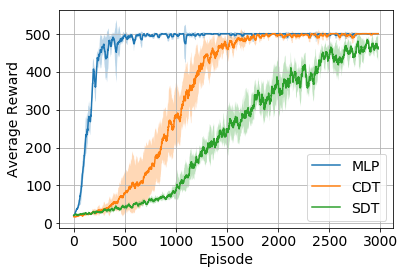

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

EnvName = 'CartPole-v1'
model=['mlp', 'cdt', 'sdt']  # 'rl' i.e. 'mlp'
id_list=np.arange(1,6)

def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)

    
plt.figure(figsize=(6,4))

for m in model:
    data=[]
    conf_path = '../src/'+m
    json_fname = [filename for filename in os.listdir(conf_path) if filename.endswith("rl_train.json")]
    conf_path = conf_path+'/'+json_fname[0]
    with open(conf_path, "r") as read_file:
        rl_confs = json.load(read_file)  # hyperparameters for rl training
    for i in id_list:
        log_path = rl_confs[EnvName]["train_confs"]["log_path"]+str(i)+'.npy'
        rs = np.load(log_path) # reward log
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    plot_with_fill(x, data, label = m.upper())
    
plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data_no_norm/rl/imgs/cartpole/rl_cartpole.pdf')
plt.show()

## LunarLander-v2
with state normalization

[1 2 3]
../data/mlp/log/lunarlander/reward1.npy
../data/mlp/log/lunarlander/reward2.npy
../data/mlp/log/lunarlander/reward3.npy
(4980,)
../data/cdt/log/lunarlander/rl_reward1.npy
../data/cdt/log/lunarlander/rl_reward2.npy
../data/cdt/log/lunarlander/rl_reward3.npy
(4980,)
../data/sdt/log/lunarlander/rl_reward1.npy
../data/sdt/log/lunarlander/rl_reward2.npy
../data/sdt/log/lunarlander/rl_reward3.npy
(4980,)


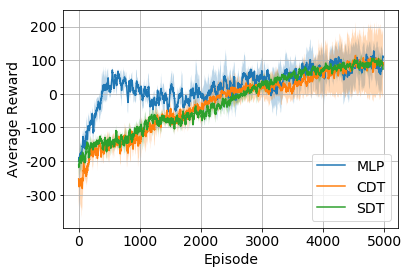

In [17]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

EnvName = 'LunarLander-v2'
model=['mlp', 'cdt', 'sdt']  # 'rl' i.e. 'mlp'
id_list=np.arange(1,4)
print(id_list)

def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)

    
plt.figure(figsize=(6,4))

for m in model:
    data=[]
    conf_path = '../src/'+m
    json_fname = [filename for filename in os.listdir(conf_path) if filename.endswith("rl_train.json")]
    conf_path = conf_path+'/'+json_fname[0]
    with open(conf_path, "r") as read_file:
        rl_confs = json.load(read_file)  # hyperparameters for rl training
    for i in id_list:
        log_path = rl_confs[EnvName]["train_confs"]["log_path"]+str(i)+'.npy'
        print(log_path)
        rs = np.load(log_path) # reward log
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    if m == 'rl':
        plot_with_fill(x, data, label = 'MLP')
    else:
        plot_with_fill(x, data, label = m.upper())
    print(rs.shape)
    
plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data/rl/imgs/lunarlander/rl_lunarlander.pdf')
plt.show()

## LunarLander-v2
without state normalization

[1 2 3]
../data_no_norm/mlp/log/lunarlander/reward1.npy
../data_no_norm/mlp/log/lunarlander/reward2.npy
../data_no_norm/mlp/log/lunarlander/reward3.npy
(4980,)
../data_no_norm/cdt/log/lunarlander/rl_reward1.npy
../data_no_norm/cdt/log/lunarlander/rl_reward2.npy
../data_no_norm/cdt/log/lunarlander/rl_reward3.npy
(4980,)
../data_no_norm/sdt/log/lunarlander/rl_reward1.npy
../data_no_norm/sdt/log/lunarlander/rl_reward2.npy
../data_no_norm/sdt/log/lunarlander/rl_reward3.npy
(4980,)


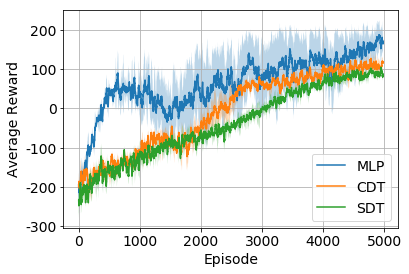

In [3]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

EnvName = 'LunarLander-v2'
model=['mlp', 'cdt', 'sdt']  # 'rl' i.e. 'mlp'
id_list=np.arange(1,4)
print(id_list)

def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)

    
plt.figure(figsize=(6,4))

for m in model:
    data=[]
    conf_path = '../src/'+m
    json_fname = [filename for filename in os.listdir(conf_path) if filename.endswith("rl_train.json")]
    conf_path = conf_path+'/'+json_fname[0]
    with open(conf_path, "r") as read_file:
        rl_confs = json.load(read_file)  # hyperparameters for rl training
    for i in id_list:
        log_path = rl_confs[EnvName]["train_confs"]["log_path"]+str(i)+'.npy'
        print(log_path)
        rs = np.load(log_path) # reward log
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    if m == 'rl':
        plot_with_fill(x, data, label = 'MLP')
    else:
        plot_with_fill(x, data, label = m.upper())
    print(rs.shape)
    
plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data_no_norm/rl/imgs/lunarlander/rl_lunarlander.pdf')
plt.show()

## MountainCar-v0
with state normaliza|tion

[1, 3]
0
../data/mlp/log/mountaincar/reward1.npy
../data/mlp/log/mountaincar/reward3.npy
(4980,)
1
../data/cdt/log/mountaincar/rl_reward1.npy
../data/cdt/log/mountaincar/rl_reward3.npy
(4980,)
2
../data/sdt/log/mountaincar/rl_reward1.npy
../data/sdt/log/mountaincar/rl_reward3.npy
(4980,)


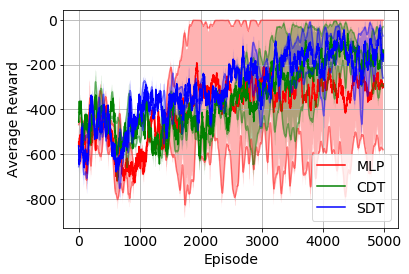

In [21]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

EnvName = 'MountainCar-v0'
model=['mlp', 'cdt', 'sdt']  # 'rl' i.e. 'mlp'
# id_list=np.arange(2,3)
id_list=[1, 3]
print(id_list)

def smooth(y, radius=20, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    for d in data:
        plt.plot(x, smooth(d), color=color, label=None, alpha=0.5)
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)

    
plt.figure(figsize=(6,4))
colors=['r', 'g', 'b']
for idx, m in enumerate(model):
    print(idx)
    data=[]
    conf_path = '../src/'+m
    json_fname = [filename for filename in os.listdir(conf_path) if filename.endswith("rl_train.json")]
    conf_path = conf_path+'/'+json_fname[0]
    with open(conf_path, "r") as read_file:
        rl_confs = json.load(read_file)  # hyperparameters for rl training
    for i in id_list:
        log_path = rl_confs[EnvName]["train_confs"]["log_path"]+str(i)+'.npy'
        print(log_path)
        rs = np.load(log_path) # reward log
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    if m == 'rl':
        plot_with_fill(x, data, label = 'MLP', color = colors[idx])
    else:
        plot_with_fill(x, data, label = m.upper(), color = colors[idx])
    print(rs.shape)
    
plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data/rl/imgs/mountaincar/rl_mountaincar.pdf')
plt.show()

## MountainCar-v0
without state normaliza|tion

[1 2 3]
0
../data_no_norm/mlp/log/mountaincar/reward1.npy
../data_no_norm/mlp/log/mountaincar/reward2.npy
../data_no_norm/mlp/log/mountaincar/reward3.npy
(4980,)
1
../data_no_norm/cdt/log/mountaincar/rl_reward1.npy
../data_no_norm/cdt/log/mountaincar/rl_reward2.npy
../data_no_norm/cdt/log/mountaincar/rl_reward3.npy
(4980,)
2
../data_no_norm/sdt/log/mountaincar/rl_reward1.npy
../data_no_norm/sdt/log/mountaincar/rl_reward2.npy
../data_no_norm/sdt/log/mountaincar/rl_reward3.npy
(4980,)


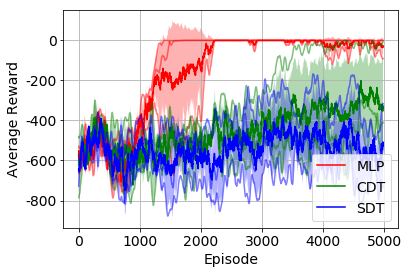

In [18]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

EnvName = 'MountainCar-v0'
model=['mlp', 'cdt', 'sdt']  # 'rl' i.e. 'mlp'
id_list=np.arange(1,4)
print(id_list)

def smooth(y, radius=20, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    for d in data:
        plt.plot(x, smooth(d), color=color, label=None, alpha=0.5)
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)

    
plt.figure(figsize=(6,4))
colors=['r', 'g', 'b']
for idx, m in enumerate(model):
    print(idx)
    data=[]
    conf_path = '../src/'+m
    json_fname = [filename for filename in os.listdir(conf_path) if filename.endswith("rl_train.json")]
    conf_path = conf_path+'/'+json_fname[0]
    with open(conf_path, "r") as read_file:
        rl_confs = json.load(read_file)  # hyperparameters for rl training
    for i in id_list:
        log_path = rl_confs[EnvName]["train_confs"]["log_path"]+str(i)+'.npy'
        print(log_path)
        rs = np.load(log_path) # reward log
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    if m == 'rl':
        plot_with_fill(x, data, label = 'MLP', color = colors[idx])
    else:
        plot_with_fill(x, data, label = m.upper(), color = colors[idx])
    print(rs.shape)
    
plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data_no_norm/rl/imgs/mountaincar/rl_mountaincar.pdf')
plt.show()

# IL training comparison

In [6]:
def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]
    
def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)



## CartPole-v1

[1 2 3 4 5]
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)


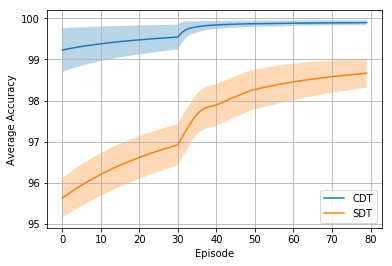

In [26]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

EnvName = 'CartPole-v1'
model=['cdt', 'sdt']
id_list=np.arange(1,6)
print(id_list)

for m in model:
    data=[]
    conf_path = '../src/'+m+'/'+m+'_il_train.json'
    with open(conf_path, "r") as read_file:
        il_confs = json.load(read_file)  # hyperparameters for rl training
#         print(il_confs)
    for i in id_list:
#         print(il_confs[EnvName]["learner_args"])
        log_path = il_confs[EnvName]["learner_args"]["log_path"]+str(i)+'_acc.npy'
        rs = np.load(log_path) # reward log
        print(rs.shape)
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    plot_with_fill(x, data, label = m.upper())
        
plt.xlabel('Episode')
plt.ylabel('Average Accuracy')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data/il/imgs/cartpole/il_compare_cartpole.pdf')
plt.show()    


## LunarLander-v2

[1 2 3 4 5]
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)
(80,)


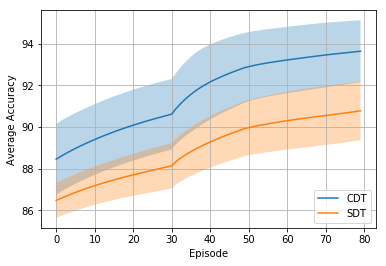

In [25]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

EnvName = 'LunarLander-v2'
model=['cdt', 'sdt']
id_list=np.arange(1,6)
print(id_list)

for m in model:
    data=[]
    conf_path = '../src/'+m+'/'+m+'_il_train.json'
    with open(conf_path, "r") as read_file:
        il_confs = json.load(read_file)  # hyperparameters for rl training
#         print(il_confs)
    for i in id_list:
#         print(il_confs[EnvName]["learner_args"])
        log_path = il_confs[EnvName]["learner_args"]["log_path"]+str(i)+'_acc.npy'
        rs = np.load(log_path) # reward log
        print(rs.shape)
        data.append(smooth(rs))
    x = np.arange(len(data[0]))
    plot_with_fill(x, data, label = m.upper())
    
plt.xlabel('Episode')
plt.ylabel('Average Accuracy')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('../data/il/imgs/lunarlander/il_compare_lunarlander.pdf')
plt.show()    


# Draw Tree

In [1]:
import numpy as np
import torch
import json
import sys
sys.path.append("..")

## SDT
### LunarLander-v2

In [2]:
EnvName = 'LunarLander-v2'
model='sdt'

conf_path = '../src/'+model+'/'+model+'_il_train.json'
with open(conf_path, "r") as read_file:
    il_confs = json.load(read_file)  # hyperparameters for rl training
model_file_path = il_confs[EnvName]["learner_args"]["model_path"]
print('Model Path: ', model_file_path)

general_filename = "../src/il/il.json"
with open(general_filename, "r") as read_file:
    general_il_confs = json.load(read_file)  # hyperparameters for rl training
    
env_suffix = EnvName.split("-")[0].lower()

img_file_path = general_il_confs["data_collect_confs"]["img_path"]+env_suffix+'/sdt'
input_path = general_il_confs["data_collect_confs"]["data_path"]+ env_suffix + '/state_norm.npy'
print('Input Path: ', input_path)
print('Image Path: ', img_file_path)

inputs = np.load(input_path)
print('Input Data Shape: ', inputs.shape)

Model Path:  ../data/sdt/model/lunarlander/il_model
Input Path:  ../data/il/samples/lunarlander/state_norm.npy
Image Path:  ../data/il/imgs/lunarlander/sdt
Input Data Shape:  (2496821, 8)


In [3]:
from src.sdt import SDT
from src.sdt.sdt_plot import draw_tree
from src.sdt.sdt_discretization import discretize_sdt

id_list=np.arange(1,6)
input_id = 1 # select one input data from dataset
DISCRETIZED = True  # choose whether the tree is discretized

il_confs[EnvName]["learner_args"]["device"] = 'cpu'
tree = SDT(il_confs[EnvName]["learner_args"])

def plot(tree, input, img_path):
    model = lambda x: tree.forward(x)[0].data.max(1)[1].squeeze().detach().numpy()
    model(torch.Tensor([input])) 
    draw_tree(tree, input_shape = (il_confs[EnvName]["learner_args"]["input_dim"],), input_img=input, savepath=img_path)

for i in id_list:
    model_path = model_file_path + str(i)
    img_path = img_file_path + str(i)+'.png'
    tree.load_model(model_path)
    plot(tree, inputs[input_id], img_path)

    if DISCRETIZED: # plot tree after discretization
        discretized_tree = discretize_sdt(tree)
        discretized_img_path = img_file_path + str(i)+'_discretized.png'
        plot(discretized_tree, inputs[input_id], discretized_img_path)
        
    else:
        plot(tree, inputs[input_id], img_path)

SDT parameters:  {'input_dim': 8, 'output_dim': 4, 'depth': 4, 'lamda': 0.001, 'lr': 0.001, 'weight_decay': 0.0, 'batch_size': 1280, 'epochs': 80, 'device': 'cpu', 'log_interval': 100, 'exp_scheduler_gamma': 1.0, 'beta': 0, 'l1_regularization': 0, 'greatest_path_probability': 1, 'model_path': '../data/sdt/model/lunarlander/il_model', 'log_path': '../data/sdt/log/lunarlander/il_log'}


### CartPole-v1

In [3]:
EnvName = 'CartPole-v1'
model='sdt'

conf_path = '../src/'+model+'/'+model+'_il_train.json'
with open(conf_path, "r") as read_file:
    il_confs = json.load(read_file)  # hyperparameters for rl training
model_file_path = il_confs[EnvName]["learner_args"]["model_path"]
print('Model Path: ', model_file_path)

general_filename = "../src/il/il.json"
with open(general_filename, "r") as read_file:
    general_il_confs = json.load(read_file)  # hyperparameters for rl training
    
env_suffix = EnvName.split("-")[0].lower()

img_file_path = general_il_confs["data_collect_confs"]["img_path"]+env_suffix+'/sdt'
input_path = general_il_confs["data_collect_confs"]["data_path"]+ env_suffix + '/state_norm.npy'
print('Input Path: ', input_path)
print('Image Path: ', img_file_path)

inputs = np.load(input_path)
print('Input Data Shape: ', inputs.shape)

Model Path:  ../data/sdt/model/cartpole/il_model
Input Path:  ../data/il/samples/cartpole/state_norm.npy
Image Path:  ../data/il/imgs/cartpole/sdt
Input Data Shape:  (5000000, 4)


In [4]:
from src.sdt import SDT
from src.sdt.sdt_plot import draw_tree
from src.sdt.sdt_discretization import discretize_sdt

id_list=np.arange(1,6)
input_id = 1 # select one input data from dataset    
DISCRETIZED = True

il_confs[EnvName]["learner_args"]["device"] = 'cpu'
tree = SDT(il_confs[EnvName]["learner_args"])

def plot(tree, input, img_path):
    model = lambda x: tree.forward(x)[0].data.max(1)[1].squeeze().detach().numpy()
    model(torch.Tensor([input])) 
    draw_tree(tree, input_shape = (il_confs[EnvName]["learner_args"]["input_dim"],), input_img=input, savepath=img_path)

for i in id_list:
    model_path = model_file_path + str(i)
    img_path = img_file_path + str(i)+'.png'
    tree.load_model(model_path)
    
    if DISCRETIZED: # plot tree after discretization
        discretized_tree = discretize_sdt(tree)
        discretized_img_path = img_file_path + str(i)+'_discretized.png'
        plot(discretized_tree, inputs[input_id], discretized_img_path)
        
    else:
        plot(tree, inputs[input_id], img_path)

SDT parameters:  {'input_dim': 4, 'output_dim': 2, 'depth': 3, 'lamda': 0.001, 'lr': 0.001, 'weight_decay': 0.0, 'batch_size': 1280, 'epochs': 80, 'device': 'cpu', 'log_interval': 100, 'exp_scheduler_gamma': 1.0, 'beta': 0, 'l1_regularization': 0, 'greatest_path_probability': 1, 'model_path': '../data/sdt/model/cartpole/il_model', 'log_path': '../data/sdt/log/cartpole/il_log'}


## CDT
### LunarLander-v2

In [3]:
EnvName = 'LunarLander-v2'
model='cdt'

conf_path = '../src/'+model+'/'+model+'_il_train.json'
with open(conf_path, "r") as read_file:
    il_confs = json.load(read_file)  # hyperparameters for rl training
model_file_path = il_confs[EnvName]["learner_args"]["model_path"]
print('Model Path: ', model_file_path)

general_filename = "../src/il/il.json"
with open(general_filename, "r") as read_file:
    general_il_confs = json.load(read_file)  # hyperparameters for rl training
    
env_suffix = EnvName.split("-")[0].lower()

img_file_path = general_il_confs["data_collect_confs"]["img_path"]+env_suffix+'/cdt'
input_path = general_il_confs["data_collect_confs"]["data_path"]+ env_suffix + '/state_norm.npy'
print('Input Path: ', input_path)
print('Image Path: ', img_file_path)

inputs = np.load(input_path)
print('Input Data Shape: ', inputs.shape)

Model Path:  ../data/cdt/model/lunarlander/il_model
Input Path:  ../data/il/samples/lunarlander/state_norm.npy
Image Path:  ../data/il/imgs/lunarlander/cdt
Input Data Shape:  (2496821, 8)


In [3]:
from src.cdt import CDT
from src.cdt.cdt_plot import draw_tree
from src.cdt.cdt_discretization import discretize_cdt


id_list=np.arange(1,6)
input_id = 1 # select one input data from dataset
tree_parts=['FL', 'DM']
DISCRETIZED = True

il_confs[EnvName]["learner_args"]["device"] = 'cpu'
tree = CDT(il_confs[EnvName]["learner_args"])

def plot(tree, input, img_path, part=None):
    model = lambda x: tree.forward(x)[0].data.max(1)[1].squeeze().detach().numpy()
    model(torch.Tensor([input])) 
    draw_tree(tree, input_img=input, DrawTree=part, savepath=img_path)

for i in id_list:
    model_path = model_file_path + str(i)
    tree.load_model(model_path)    
    if DISCRETIZED:
        discretized_tree = discretize_cdt(tree)
    
    for part in tree_parts:
        # plot tree after discretization
        if DISCRETIZED:
            discretized_img_path = img_file_path + str(i)+'_'+part+'_discretized.png'
            plot(discretized_tree, inputs[input_id], discretized_img_path, part)
            
        else:
            img_path = img_file_path + str(i)+'_'+part+'.png'
            plot(tree, inputs[input_id], img_path, part)

CDT parameters:  {'num_intermediate_variables': 2, 'feature_learning_depth': 3, 'decision_depth': 3, 'input_dim': 8, 'output_dim': 4, 'lr': 0.001, 'weight_decay': 0.0, 'batch_size': 1280, 'exp_scheduler_gamma': 1.0, 'device': 'cpu', 'epochs': 80, 'log_interval': 100, 'greatest_path_probability': 1, 'beta_fl': 0, 'beta_dc': 0, 'model_path': '../data/cdt/model/lunarlander/il_model', 'log_path': '../data/cdt/log/lunarlander/il_log'}


### CartPole-v1

In [2]:
EnvName = 'CartPole-v1'
model='cdt'

conf_path = '../src/'+model+'/'+model+'_il_train.json'
with open(conf_path, "r") as read_file:
    il_confs = json.load(read_file)  # hyperparameters for rl training
model_file_path = il_confs[EnvName]["learner_args"]["model_path"]
print('Model Path: ', model_file_path)

general_filename = "../src/il/il.json"
with open(general_filename, "r") as read_file:
    general_il_confs = json.load(read_file)  # hyperparameters for rl training
    
env_suffix = EnvName.split("-")[0].lower()

img_file_path = general_il_confs["data_collect_confs"]["img_path"]+env_suffix+'/cdt'
input_path = general_il_confs["data_collect_confs"]["data_path"]+ env_suffix + '/state_norm.npy'
print('Input Path: ', input_path)
print('Image Path: ', img_file_path)

inputs = np.load(input_path)
print('Input Data Shape: ', inputs.shape)

Model Path:  ../data/cdt/model/cartpole/il_model
Input Path:  ../data/il/samples/cartpole/state_norm.npy
Image Path:  ../data/il/imgs/cartpole/cdt
Input Data Shape:  (5000000, 4)


In [3]:
from src.cdt import CDT
from src.cdt.cdt_plot import draw_tree
from src.cdt.cdt_discretization import discretize_cdt


id_list=np.arange(1,6)
input_id = 1 # select one input data from dataset
tree_parts=['FL', 'DM']
DISCRETIZED = True

il_confs[EnvName]["learner_args"]["device"] = 'cpu'
tree = CDT(il_confs[EnvName]["learner_args"])

def plot(tree, input, img_path, part=None):
    model = lambda x: tree.forward(x)[0].data.max(1)[1].squeeze().detach().numpy()
    model(torch.Tensor([input])) 
    draw_tree(tree, input_img=input, DrawTree=part, savepath=img_path)

for i in id_list:
    model_path = model_file_path + str(i)
    tree.load_model(model_path)    
    if DISCRETIZED:
        discretized_tree = discretize_cdt(tree)
    
    for part in tree_parts:
        # plot tree after discretization
        if DISCRETIZED:
            discretized_img_path = img_file_path + str(i)+'_'+part+'_discretized.png'
            plot(discretized_tree, inputs[input_id], discretized_img_path, part)
            
        else:
            img_path = img_file_path + str(i)+'_'+part+'.png'
            plot(tree, inputs[input_id], img_path, part)

CDT parameters:  {'num_intermediate_variables': 2, 'feature_learning_depth': 2, 'decision_depth': 2, 'input_dim': 4, 'output_dim': 2, 'lr': 0.001, 'weight_decay': 0.0, 'batch_size': 1280, 'exp_scheduler_gamma': 1.0, 'device': 'cpu', 'epochs': 80, 'log_interval': 100, 'greatest_path_probability': 1, 'beta_fl': 0, 'beta_dc': 0, 'model_path': '../data/cdt/model/cartpole/il_model', 'log_path': '../data/cdt/log/cartpole/il_log'}


# RL Training Depth Comparison

In [17]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

def smooth(y, radius=30, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]
    
def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)



## Data without Normalization

### SDT

../data_no_norm/sdt_compare_depth/log/cartpole/
rl_reward_4_2.npy
4 2
rl_reward_2_3.npy
2 3
rl_reward_2_1.npy
2 1
rl_reward_4_3.npy
4 3
rl_reward_3_3.npy
3 3
rl_reward_2_2.npy
2 2
rl_reward_3_2.npy
3 2
rl_reward_3_1.npy
3 1
rl_reward_4_1.npy
4 1
['2', '3', '4']


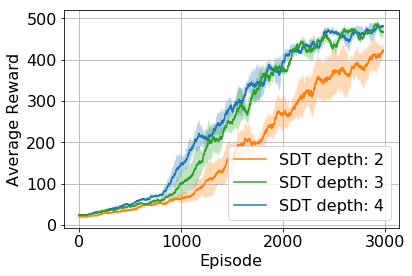

In [21]:
EnvName = 'CartPole-v0'

data_path = '../data_no_norm/sdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

fig, ax = plt.subplots(1)

depth_list=[]
tree_id_list=[]

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    data_list=[]
    for i in set(tree_id_list):
        data = np.load(data_path+'_'.join((name, d, i))+'.npy')
        data_list.append(smooth(data))
    x = np.arange(len(data))
    plot_with_fill(x, data_list, label = 'SDT depth: '+str(d))
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data_no_norm/rl/imgs/cartpole/rl_compare_cartpole_sdt.pdf')
plt.show()

../data_no_norm/sdt_compare_depth/log/lunarlander/
rl_reward_4_2.npy
4 2
rl_reward_2_3.npy
2 3
rl_reward_2_1.npy
2 1
rl_reward_4_3.npy
4 3
rl_reward_3_3.npy
3 3
rl_reward_2_2.npy
2 2
rl_reward_3_2.npy
3 2
rl_reward_3_1.npy
3 1
rl_reward_4_1.npy
4 1
['2', '3', '4']


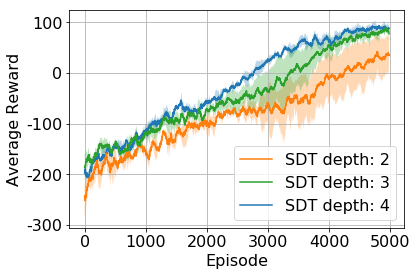

In [22]:
EnvName = 'LunarLander-v2'

data_path = '../data_no_norm/sdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

fig, ax = plt.subplots(1)

depth_list=[]
tree_id_list=[]

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    data_list=[]
    for i in set(tree_id_list):
        data = np.load(data_path+'_'.join((name, d, i))+'.npy')
        data_list.append(smooth(data))
    x = np.arange(len(data))
    plot_with_fill(x, data_list, label = 'SDT depth: '+str(d))
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data_no_norm/rl/imgs/lunarlander/rl_compare_lunarlander_sdt.pdf')
plt.show()

### CDT

The depth "a+b": a is depth of feature learning tree, b is depth of decision making tree.

../data_no_norm/cdt_compare_depth/log/cartpole/
rl_reward_32_3.npy
32 3
rl_reward_22_1.npy
22 1
rl_reward_32_1.npy
32 1
rl_reward_12_2.npy
12 2
rl_reward_22_2.npy
22 2
rl_reward_22_3.npy
22 3
rl_reward_12_3.npy
12 3
rl_reward_12_1.npy
12 1
rl_reward_32_2.npy
32 2
['12', '22', '32']


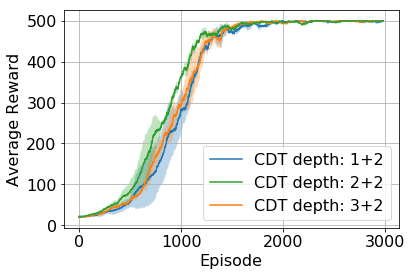

In [23]:
EnvName = 'CartPole-v0'


data_path = '../data_no_norm/cdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

fig, ax = plt.subplots(1)

depth_list=[]
tree_id_list=[]

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    data_list=[]
    for i in set(tree_id_list):
        data = np.load(data_path+'_'.join((name, d, i))+'.npy')
        data_list.append(smooth(data))
    x = np.arange(len(data))
    plot_with_fill(x, data_list, label = 'CDT depth: '+d[0]+'+'+d[1])
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data_no_norm/rl/imgs/cartpole/rl_compare_cartpole_cdt.pdf')
plt.show()

../data_no_norm/cdt_compare_depth/log/lunarlander/
rl_reward_33_2.npy
33 2
rl_reward_21_2.npy
21 2
rl_reward_23_2.npy
23 2
rl_reward_24_1.npy
24 1
rl_reward_23_3.npy
23 3
rl_reward_25_3.npy
25 3
rl_reward_26_3.npy
26 3
rl_reward_32_3.npy
32 3
rl_reward_23_1.npy
23 1
rl_reward_24_3.npy
24 3
rl_reward_22_1.npy
22 1
rl_reward_26_2.npy
26 2
rl_reward_32_1.npy
32 1
rl_reward_22_2.npy
22 2
rl_reward_28_1.npy
28 1
rl_reward_21_3.npy
21 3
rl_reward_22_3.npy
22 3
rl_reward_26_1.npy
26 1
rl_reward_33_1.npy
33 1
rl_reward_21_1.npy
21 1
rl_reward_25_1.npy
25 1
rl_reward_27_2.npy
27 2
rl_reward_27_3.npy
27 3
rl_reward_33_3.npy
33 3
rl_reward_25_2.npy
25 2
rl_reward_32_2.npy
32 2
rl_reward_24_2.npy
24 2
rl_reward_27_1.npy
27 1
['21', '22', '23', '24', '25', '26', '27', '28', '32', '33']


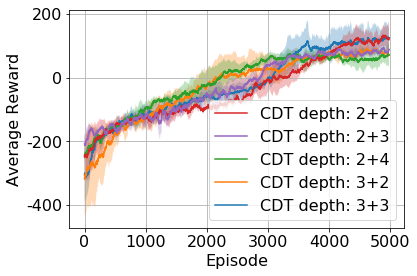

In [26]:
EnvName = 'LunarLander-v2'


data_path = '../data_no_norm/cdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

depth_list=[]
tree_id_list=[]

fig, ax = plt.subplots(1)

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    if (int(d)>21 and int(d)<25) or int(d)>30:
        data_list=[]
        for i in set(tree_id_list):
            data = np.load(data_path+'_'.join((name, d, i))+'.npy')
            data_list.append(smooth(data))
        x = np.arange(len(data))
        plot_with_fill(x, data_list, label = 'CDT depth: '+d[0]+'+'+d[1])
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data_no_norm/rl/imgs/lunarlander/rl_compare_lunarlander_cdt.pdf')
plt.show()

## Data with Normalization

### SDT

../data/sdt_compare_depth/log/cartpole/
rl_reward_4_2.npy
4 2
rl_reward_2_3.npy
2 3
rl_reward_2_1.npy
2 1
rl_reward_4_3.npy
4 3
rl_reward_3_3.npy
3 3
rl_reward_2_2.npy
2 2
rl_reward_3_2.npy
3 2
rl_reward_3_1.npy
3 1
rl_reward_4_1.npy
4 1
['2', '3', '4']


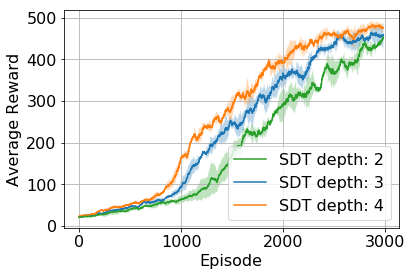

In [23]:
EnvName = 'CartPole-v0'

data_path = '../data/sdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

fig, ax = plt.subplots(1)

depth_list=[]
tree_id_list=[]

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    data_list=[]
    for i in set(tree_id_list):
        data = np.load(data_path+'_'.join((name, d, i))+'.npy')
        data_list.append(smooth(data))
    x = np.arange(len(data))
    plot_with_fill(x, data_list, label = 'SDT depth: '+str(d))
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data/rl/imgs/cartpole/rl_compare_cartpole_sdt.pdf')
plt.show()

../data/sdt_compare_depth/log/lunarlander/
rl_reward_4_2.npy
4 2
rl_reward_2_3.npy
2 3
rl_reward_2_1.npy
2 1
rl_reward_4_3.npy
4 3
rl_reward_3_3.npy
3 3
rl_reward_2_2.npy
2 2
rl_reward_3_2.npy
3 2
rl_reward_3_1.npy
3 1
rl_reward_4_1.npy
4 1
['2', '3', '4']


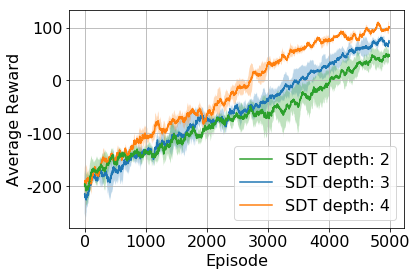

In [24]:
EnvName = 'LunarLander-v2'

data_path = '../data/sdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

fig, ax = plt.subplots(1)

depth_list=[]
tree_id_list=[]

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    data_list=[]
    for i in set(tree_id_list):
        data = np.load(data_path+'_'.join((name, d, i))+'.npy')
        data_list.append(smooth(data))
    x = np.arange(len(data))
    plot_with_fill(x, data_list, label = 'SDT depth: '+str(d))
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data/rl/imgs/lunarlander/rl_compare_lunarlander_sdt.pdf')
plt.show()

### CDT

../data/cdt_compare_depth/log/cartpole/
rl_reward_32_3.npy
32 3
rl_reward_22_1.npy
22 1
rl_reward_32_1.npy
32 1
rl_reward_12_2.npy
12 2
rl_reward_22_2.npy
22 2
rl_reward_22_3.npy
22 3
rl_reward_12_3.npy
12 3
rl_reward_12_1.npy
12 1
rl_reward_32_2.npy
32 2
['12', '22', '32']


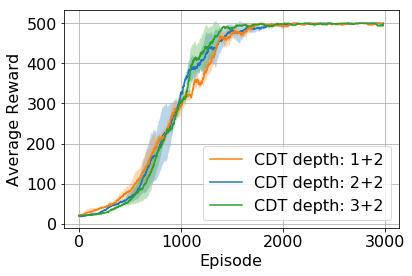

In [25]:
EnvName = 'CartPole-v0'


data_path = '../data/cdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

fig, ax = plt.subplots(1)

depth_list=[]
tree_id_list=[]

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    data_list=[]
    for i in set(tree_id_list):
        data = np.load(data_path+'_'.join((name, d, i))+'.npy')
        data_list.append(smooth(data))
    x = np.arange(len(data))
    plot_with_fill(x, data_list, label = 'CDT depth: '+d[0]+'+'+d[1])
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data/rl/imgs/cartpole/rl_compare_cartpole_cdt.pdf')
plt.show()

../data/cdt_compare_depth/log/lunarlander/
rl_reward_33_2.npy
33 2
rl_reward_23_2.npy
23 2
rl_reward_23_3.npy
23 3
rl_reward_32_3.npy
32 3
rl_reward_23_1.npy
23 1
rl_reward_22_1.npy
22 1
rl_reward_32_1.npy
32 1
rl_reward_22_2.npy
22 2
rl_reward_22_3.npy
22 3
rl_reward_33_1.npy
33 1
rl_reward_33_3.npy
33 3
rl_reward_32_2.npy
32 2
['22', '23', '32', '33']


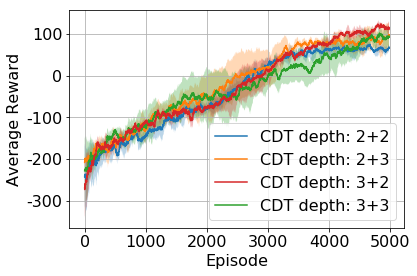

In [26]:
EnvName = 'LunarLander-v2'

data_path = '../data/cdt_compare_depth/log/'+EnvName.split("-")[0].lower()+'/'
print(data_path)

depth_list=[]
tree_id_list=[]

fig, ax = plt.subplots(1)

for filename in os.listdir(data_path):
    print(filename)
    prefix, suffix = filename.split('.')
    if suffix == 'npy':
#         print('_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:])
        name, [depth, tree_id] = '_'.join((prefix.split('_')[:-2])), prefix.split('_')[-2:]
        print(depth, tree_id)

        depth_list.append(depth)
        tree_id_list.append(tree_id)

depth_list=list(set(depth_list))
depth_list.sort()
tree_id_list=list(set(tree_id_list))
tree_id_list.sort()
print(depth_list)
for d in set(depth_list): # set() to find unique values in list  
    if int(d)<26 or int(d)>30:
        data_list=[]
        for i in set(tree_id_list):
            data = np.load(data_path+'_'.join((name, d, i))+'.npy')
            data_list.append(smooth(data))
        x = np.arange(len(data))
        plot_with_fill(x, data_list, label = 'CDT depth: '+d[0]+'+'+d[1])
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
handles, labels = ax.get_legend_handles_labels()
# sort labels in legend
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, loc=4)
ax.grid()
plt.savefig('../data/rl/imgs/lunarlander/rl_compare_lunarlander_cdt.pdf')
plt.show()